# 상관분석이란?

피어슨 상관 계수는 -1부터 1까지의 값을 가집니다.

1에 가까울수록 두 변수는 강한 양의 상관 관계를 가지며, 한 변수가 증가할 때 다른 변수도 증가하는 경향을 보입니다.  
-1에 가까울수록 두 변수는 강한 음의 상관 관계를 가지며, 한 변수가 증가할 때 다른 변수는 감소하는 경향을 보입니다.  
0은 두 변수 사이에 선형적인 관계가 없음을 나타냅니다.  

In [13]:
!pip install statsmodels
!pip install plotly

In [14]:
# data
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Visualization
import matplotlib as plt
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go

In [15]:
stocks = px.data.stocks()
stocks

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [16]:
corr_df = stocks.corr()
corr_df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
GOOG,1.000000,0.833629,0.556702,0.633169,0.140254,0.747029
AAPL,0.833629,1.000000,0.560877,0.493498,0.049519,0.786771
AMZN,0.556702,0.560877,1.000000,0.341430,0.619946,0.660896
FB,0.633169,0.493498,0.341430,1.000000,0.265663,0.472227
NFLX,0.140254,0.049519,0.619946,0.265663,1.000000,0.079532
MSFT,0.747029,0.786771,0.660896,0.472227,0.079532,1.000000


In [18]:
corr_df = corr_df.apply(lambda x: round(x , 2))
corr_df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
GOOG,1.00,0.83,0.56,0.63,0.14,0.75
AAPL,0.83,1.00,0.56,0.49,0.05,0.79
AMZN,0.56,0.56,1.00,0.34,0.62,0.66
FB,0.63,0.49,0.34,1.00,0.27,0.47
NFLX,0.14,0.05,0.62,0.27,1.00,0.08
MSFT,0.75,0.79,0.66,0.47,0.08,1.00


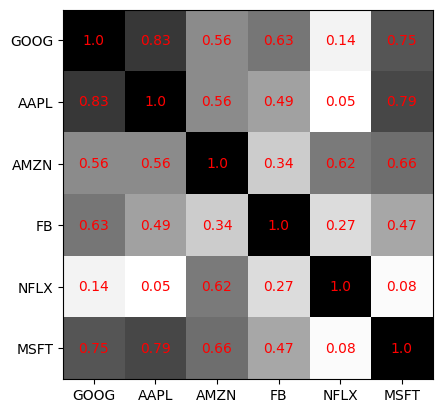

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap = 'Greys')

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)): # 6번 반복
    for y in range(len(corr_df.index)): #6번 반복 
        ax.text(y, x, corr_df.iloc[y, x], ha='center',va = 'center', color = 'r')
plt.show()

In [27]:
# 폴더에 저장
fig.savefig('morn.png',dpi=300)

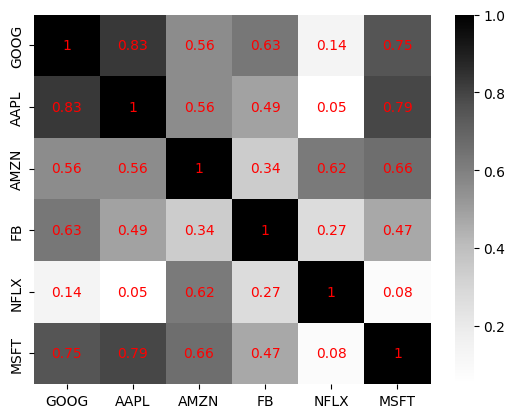

In [26]:
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='r'), cmap='Greys')
plt.show()

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets

# !pip install scikit-learn==1.1.1
data = datasets.load_diabetes()

In [30]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [29]:
# 컬럼
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [31]:
data['data'].shape

(442, 10)

In [32]:
data['target'].shape

(442,)

In [33]:
data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [36]:
df = pd.DataFrame(data['data'], index = data['target'], columns = data['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


<function matplotlib.pyplot.show(close=None, block=None)>

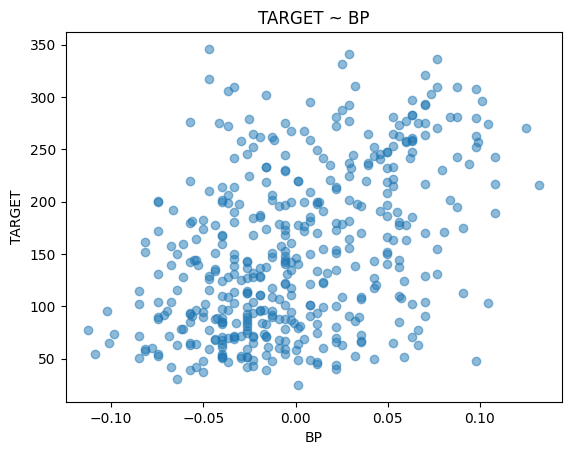

In [41]:
X = df.bp.values
#X = df.sex.values 이 값을 바꿔주면서 상관관계 분석하기 
Y = df.index.values

plt.scatter(X, Y, alpha=0.5)
plt.title('TARGET ~ BP')
plt.xlabel('BP')
plt.ylabel('TARGET')
plt.show

In [42]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x, 2))
corr_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00
